In [10]:
import numpy as np
import pandas as pd
import sys

from matplotlib import pyplot as plt

from neunet.neunet import NeuralNet
from neunet.layer import *
from analysis.classification_error_analyser import ClassificationErrorAnalyser

In [11]:
def prepare_df(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    df[columns] = df[columns].apply(lambda s: s.apply(lambda x: x / 255))
    return df


def convert_target_to_vector(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    target = df[column_name]
    new_target = np.zeros((len(df.index), 10))
    for label, val in target.items():
        new_target[label, int(val)] = 1.0
    new_target_df = pd.DataFrame(new_target, columns=["is_0", "is_1", "is_2", "is_3", "is_4", "is_5", "is_6", "is_7", "is_8", "is_9"])
    df = df.drop([column_name], axis=1)
    return df.join(new_target_df)

def show_plots_classification(analyser: ClassificationErrorAnalyser, msg: str):
    recall = analyser.recall()
    precision = analyser.precision()
    accuracy = analyser.accuracy()
    f_score = analyser.f_score()

    border = 0.5
    ind = analyser.get_index_by_border(border)

    print(f"\n{msg}\n border = {border}\n recall = {recall[ind]}\n precision = {precision[ind]}\n "
          f"accuracy = {accuracy[ind]}\n F-score = {f_score[ind]}\n")

    tpr = analyser.tpr()
    fpr = analyser.fpr()
    fnr = analyser.fnr()

    fig, axs = plt.subplots(1, 2)
    plt.title('test', fontsize=15)
    axs[0].plot(fpr, fpr, fpr, tpr)
    axs[0].grid(True)
    axs[0].set_title(label='ROC', fontsize=10)
    axs[1].plot(fpr, fpr, fpr, fnr)
    axs[1].grid(True)
    axs[1].set_title(label='DET', fontsize=10)
    plt.show()

In [12]:
dataset_train_path = "MNIST_dataset/mnist_train.csv"
dataset_test_path = "MNIST_dataset/mnist_test.csv"

In [13]:
learn = pd.read_csv(dataset_train_path)
learn[learn.columns] = learn[learn.columns].astype(float)
columns_list = list(learn.columns[1:])
columns_list.append(learn.columns[0])
learn = learn[columns_list]
learn = prepare_df(learn, columns_list[:-1])
learn = convert_target_to_vector(learn, learn.columns[-1])
learn

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,is_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
test = pd.read_csv(dataset_test_path)
test = test[columns_list]
test = prepare_df(test, columns_list[:-1])
test = convert_target_to_vector(test, test.columns[-1])
test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,is_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
hidden_1 = 120
hidden_2 = 84
#nn = NeuralNet(dir_name='./classification_weights')
#"""
nn = NeuralNet(learn_rate=0.0005,  layers=[
    ConvLayer((1, 28, 28), dims_filter=(1, 3, 3), num_filters=6, start_weight_multiplier=0.1,
              funcs=["ReLu"] * 2304, deviation=0.0),
    PoolLayer("avg", (6, 26, 26)),
    ConvLayer((6, 13, 13), dims_filter=(6, 4, 4), num_filters=16, start_weight_multiplier=0.1,
              funcs=["ReLu"] * 576, deviation=0.0),
    PoolLayer("avg", (16, 10, 10)),
    DenseLayer(dims=(hidden_1, 400), funcs=["sigmoid"] * hidden_1, deviation=0.5),
    DenseLayer(dims=(hidden_2, hidden_1), funcs=["sigmoid"] * hidden_2, deviation=0.5),
    DenseLayer(dims=(10, hidden_2), funcs=["sigmoid"], deviation=0.5)
])
#"""

1000: expected = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], gained = [ 0.14671704  0.15321782 -0.2131115   0.17305529 -0.01045012  0.26758282
 -0.03359595  0.18320523  0.04911209  0.13405561], error = [ 0.85328296 -0.15321782  0.2131115  -0.17305529  0.01045012 -0.26758282
  0.03359595 -0.18320523 -0.04911209 -0.13405561]
learn time: 63.17895293235779
2000: expected = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], gained = [ 0.11677338  0.26763104 -0.32678544  0.26886723 -0.20366316 -0.08316497
  0.02828858  0.03773896 -0.29887338  0.21023212], error = [-0.11677338 -0.26763104  0.32678544 -0.26886723  0.20366316  1.08316497
 -0.02828858 -0.03773896  0.29887338 -0.21023212]
learn time: 125.96600413322449
3000: expected = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], gained = [ 0.11988384 -0.07443383  0.20534822  0.19407816  0.11182989  0.01801515
  0.06593298  0.01282299  0.18711563  0.12226033], error = [-0.11988384  0.07443383 -0.20534822 -0.19407816 -0.11182989 -0.01801515
 -0.06593298 -0.01282299 -0.18711563  0.8777396

C:\Users\AMats\NeuralNetworks\lab_4_convolution\analysis\classification_error_analyser.py:117: RuntimeWarning: invalid value encountered in divide
  precisions = np.divide(self.__TP.reshape(total), self.__TP.reshape(total) + self.__FP.reshape(total))



learn
 border = 0.5
 recall = 0.5660002869048365
 precision = 0.9396519809699632
 accuracy = 0.9534733333333332
 F-score = 0.7064623116071603



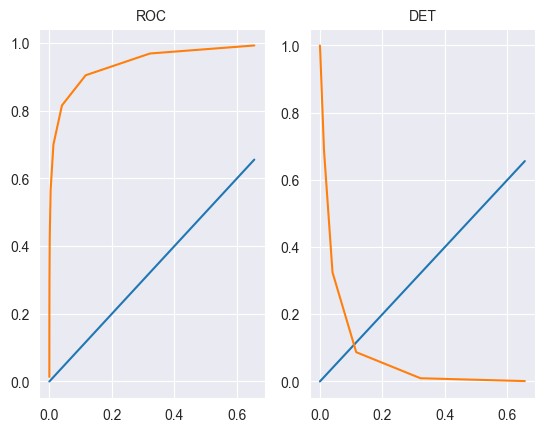

In [16]:
#"""
expected_gained_learn = nn.learn(learn, num_epochs=5, categorical=True, need_preparations=False)
learn_analyser = ClassificationErrorAnalyser(expected_gained_learn, 10, border_step=0.1)
show_plots_classification(learn_analyser, "learn")
#"""


test
 border = 0.5
 recall = 0.8054438247147339
 precision = 0.9347618184472051
 accuracy = 0.97499
 F-score = 0.8652978884488697



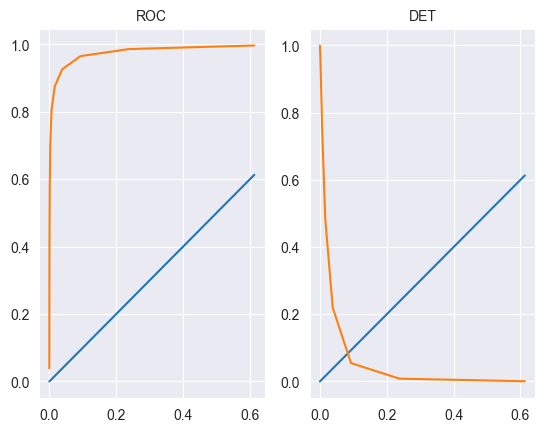

In [17]:
expected_gained_test = nn.test(test, categorical=True, need_preparation=False)
test_analyser = ClassificationErrorAnalyser(expected_gained_test, 10, border_step=0.1)
show_plots_classification(test_analyser, "test")

In [18]:
nn.save_net("./classification_weights")

saving weights...
